In [1]:
import os
import pandas as pd 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

In [2]:
pwd # Directory Path

'C:\\Users\\TrinaNaskar\\Documents\\Daimler\\New Code\\CODES-Steel'

## Data Input

### Input and Transforms

In [10]:
series = read_csv('SteelDataset_2009.csv',parse_dates=[1], index_col=0)

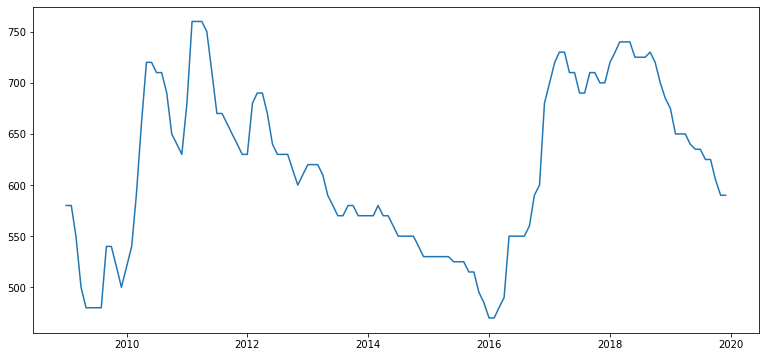

In [11]:
pyplot.figure(figsize = (13,6))
series['Price'] = series['Price'].astype(str).astype(float)
series.index = pd.to_datetime(series.index)
pyplot.plot(series)
pyplot.show()

In [6]:
series.tail()

,Price
Date,
2019-08-01,625.0
2019-09-01,625.0
2019-10-01,605.0
2019-11-01,590.0
2019-12-01,590.0


## 2 Year Data Split

In [27]:
#divide into train and validation set
train_x = series[:108]
valid_x = series[108:]

In [28]:
len(valid_x)

24

## Build the Model

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


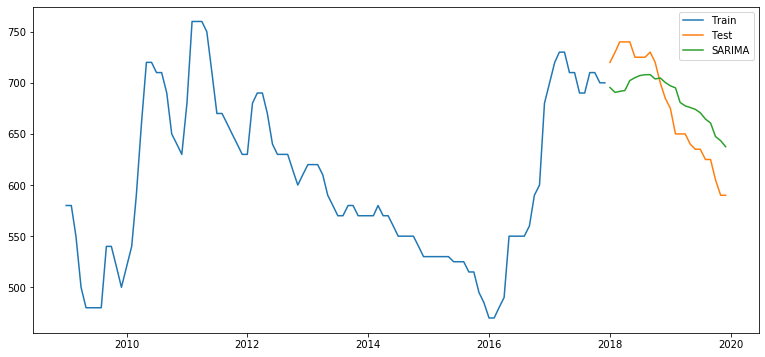

In [29]:
import statsmodels.api as sm

y_hat_avg = valid_x.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_x.Price, order=(1, 0, 4),seasonal_order=(5,0,0,17)).fit()
y_hat_avg['SARIMA'] = fit1.predict(valid_x.index[0], valid_x.index[len(valid_x)-1],dynamic=True)
plt.figure(figsize=(13,6))
plt.plot( train_x['Price'], label='Train')
plt.plot(valid_x['Price'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

## MAPE Calculation

In [30]:
ape =  abs(valid_x['Price'] - y_hat_avg['SARIMA'])/valid_x['Price']
mape = sum(ape)/len(ape)
print(mape)

0.048044405528852675



## 1 Year Data Split

In [31]:
#divide into train and validation set
train_x = series[:120]
valid_x = series[120:]

In [32]:
len(valid_x)

12

## Build the Model

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


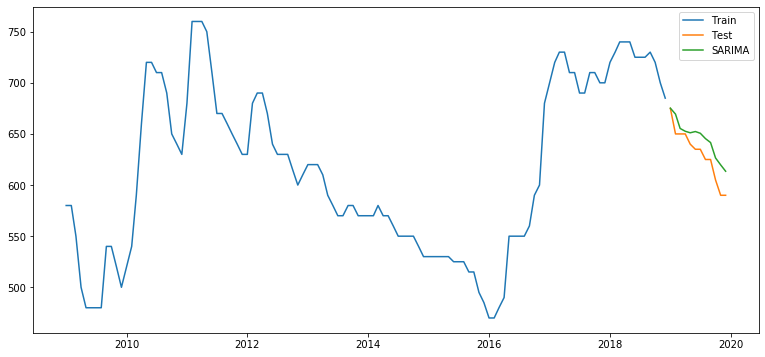

In [33]:
import statsmodels.api as sm

y_hat_avg = valid_x.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_x.Price, order=(1, 0, 4),seasonal_order=(5,0,0,17)).fit()
y_hat_avg['SARIMA'] = fit1.predict(valid_x.index[0], valid_x.index[len(valid_x)-1],dynamic=True)
plt.figure(figsize=(13,6))
plt.plot( train_x['Price'], label='Train')
plt.plot(valid_x['Price'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

## MAPE Calculation

In [34]:
ape =  abs(valid_x['Price'] - y_hat_avg['SARIMA'])/valid_x['Price']
mape = sum(ape)/len(ape)
print(mape)

0.024722740021498837


## Future 24 Forecasts

## Read temp file for storing predictions

In [36]:
y_hat = read_csv('Y-hat-avg-forward_temp.csv',parse_dates=[1], index_col=0)
y_hat['Price'] = y_hat['Price'].astype(str).astype(float)
y_hat.index = pd.to_datetime(y_hat.index)

## Split the Data

In [40]:
train_x = series[:132]
#valid_x = series_x[120:132]
train_x_exog = y_hat[:132]
valid_x_exog = y_hat[132:132+24]

In [42]:
valid_x_exog.head()

,Price
Date,
2020-01-01,0.0
2020-02-01,0.0
2020-03-01,0.0
2020-04-01,0.0
2020-05-01,0.0


## Build the Model

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


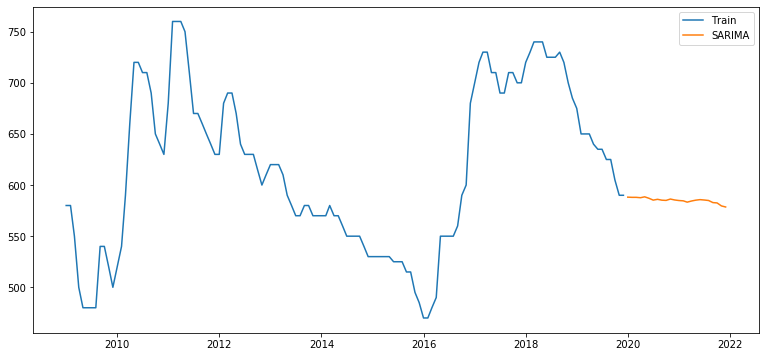

In [44]:
import statsmodels.api as sm

y_hat_avg = valid_x_exog.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_x.Price, order=(1, 0, 4),seasonal_order=(5,0,0,18), exog = train_x_exog).fit()
y_hat_avg['SARIMA'] = fit1.predict(valid_x_exog.index[0], valid_x_exog.index[len(valid_x_exog)-1],exog = valid_x_exog, dynamic=True)
plt.figure(figsize=(13,6))
plt.plot( train_x['Price'], label='Train')
#plt.plot(valid_x['Price'], label='Test')
#plt.plot(fit1.fittedvalues, label = "Fitted Values")
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [45]:
y_hat_avg['SARIMA']

Date
2020-01-01    588.164098
2020-02-01    587.980763
2020-03-01    587.994659
2020-04-01    587.618934
2020-05-01    588.493124
2020-06-01    587.047048
2020-07-01    585.268394
2020-08-01    586.052758
2020-09-01    585.207294
2020-10-01    584.990519
2020-11-01    586.322529
2020-12-01    585.424215
2021-01-01    584.870061
2021-02-01    584.564591
2021-03-01    583.283301
2021-04-01    584.393166
2021-05-01    585.224163
2021-06-01    585.739168
2021-07-01    585.376893
2021-08-01    584.901733
2021-09-01    582.848154
2021-10-01    582.515640
2021-11-01    579.592910
2021-12-01    578.557343
Name: SARIMA, dtype: float64

## Accuracy Sheet Loop

In [ ]:
import statsmodels.api as sm
import datetime

accuracy = pd.read_csv("C:\\Users\\TrinaNaskar\\Documents\\Daimler\\Notebooks\\Accuracy_Input_Steel_temp.csv")


# Setting date to index

accuracy['Snap_Month'] = pd.to_datetime(accuracy['Snap_Month'])

accuracy.set_index('Snap_Month', inplace=True)

#print(accuracy)


for i in range(108,132):
    
    train_x = series_x[:i]
    #valid_x = series_x[i:i+24]
    train_x_exog = exog_series[:i]
    valid_x_exog = exog_series[i:i+24]

    y_hat_avg = valid_x_exog.copy()
    fit1 = sm.tsa.statespace.SARIMAX(train_x.Price, order=(1, 0, 4),seasonal_order=(5,0,0,18), exog = train_x_exog).fit()
    y_hat_avg['SARIMA'] = fit1.predict(valid_x_exog.index[0],valid_x_exog.index[len(valid_x_exog)-1],exog = valid_x_exog, dynamic=True)
    #print(y_hat_avg['ARIMAX'])
    forecast1 = pd.DataFrame({'Prediction': y_hat_avg['SARIMA']})
    forecast1.set_index(accuracy.index[i-106:i-106+24],inplace=True)
    print(forecast1)
    accuracy=pd.merge(accuracy,forecast1,how='outer',left_index=True,right_index=True)




accuracy.columns = ['A','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19','F20','F21','F22','F23','F24','F25']

print(accuracy)    

accuracy.to_csv("C:\\Users\\TrinaNaskar\\Documents\\Daimler\\Notebooks\\Accuracy_Sheet_Steel_SARIMA_DecUpdate.csv")
